In [2]:
# Pull in data and save it to a DataFrame

import pandas as pd

# Replace this with the path to your CSV file
file_path = '/Users/christopherfrye/Library/Mobile Documents/com~apple~CloudDocs/NYU Stern/2025_Summer Term/AI in Finance/home_credit_cleaned.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the headers and the first 5 rows of the CSV
print("Headers:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Headers: ['id', 'default', 'code_gender', 'flag_own_car', 'flag_own_realty', 'amt_income_total', 'amt_credit', 'days_employed', 'document_count', 'credit_score_mean', 'credit_score_stdev', 'age_range', 'educated', 'children', 'married']

First few rows:
       id  default  code_gender  flag_own_car  flag_own_realty  \
0  100002        1            1             0                1   
1  100003        0            0             0                0   
2  100004        0            1             1                1   
3  100008        0            1             0                1   
4  100009        0            0             1                1   

   amt_income_total  amt_credit  days_employed  document_count  \
0          202500.0    406597.5            637               1   
1          270000.0   1293502.5           1188               1   
2           67500.0    135000.0            225               0   
3           99000.0    490495.5           1588               1   
4          171000.0

In [8]:
# Exploratory Data Analysis -- create visualization and calculate summary statistics
# Goal: predict whether a given applicant will experience a default (late payment or nonpayment)

# Display summary statistics for selected columns
selected_columns = ['flag_own_car','flag_own_realty','amt_income_total','amt_credit','days_employed','document_count','credit_score_mean','credit_score_stdev','age_range','educated','children','married']
print(df[selected_columns].describe())

        flag_own_car  flag_own_realty  amt_income_total    amt_credit  \
count  172460.000000    172460.000000      1.724600e+05  1.724600e+05   
mean        0.403688         0.675629      1.783905e+05  6.329078e+05   
std         0.490638         0.468141      3.037301e+05  4.166882e+05   
min         0.000000         0.000000      2.655000e+04  4.500000e+04   
25%         0.000000         0.000000      1.125000e+05  2.854530e+05   
50%         0.000000         1.000000      1.575000e+05  5.400000e+05   
75%         1.000000         1.000000      2.250000e+05  8.709952e+05   
max         1.000000         1.000000      1.170000e+08  4.050000e+06   

       days_employed  document_count  credit_score_mean  credit_score_stdev  \
count  172460.000000   172460.000000      172460.000000        1.724600e+05   
mean     2446.907149        0.929746           0.506127        1.505666e-01   
std      2348.738892        0.363400           0.140465        9.735277e-02   
min         1.000000      

In [9]:
# Summary statistics for continuous variables grouped by 'default'
summary_continuous = df.groupby('default').agg({
    'credit_score_mean': ['mean', 'std', 'min', 'max', 'median'],
    'amt_income_total': ['mean', 'std', 'min', 'max', 'median'],
    'amt_credit': ['mean', 'std', 'min', 'max', 'median'],
    'days_employed': ['mean', 'std', 'min', 'max', 'median']
})

# Display the summary statistics
print(summary_continuous)

# For categorical variables, display counts grouped by 'default'
categorical_columns = ['code_gender', 'flag_own_car', 'flag_own_realty', 
                       'age_range', 'educated', 'children', 'married']
categorical_summary = pd.DataFrame()

for col in categorical_columns:
    categorical_summary[col] = df.groupby('default')[col].value_counts()

print(categorical_summary)

        credit_score_mean                                          \
                     mean       std       min       max    median   
default                                                             
0                0.515993  0.135669  0.011888  0.863816  0.525988   
1                0.395738  0.145852  0.000269  0.837075  0.395762   

        amt_income_total                                                 \
                    mean            std      min          max    median   
default                                                                   
0          178708.673059  116547.886228  26550.0   18000090.0  157500.0   
1          174830.952505  986160.125423  27000.0  117000000.0  153000.0   

            amt_credit                                               \
                  mean            std      min        max    median   
default                                                               
0        637969.172032  421674.808923  45000.0  4050000.0  540000

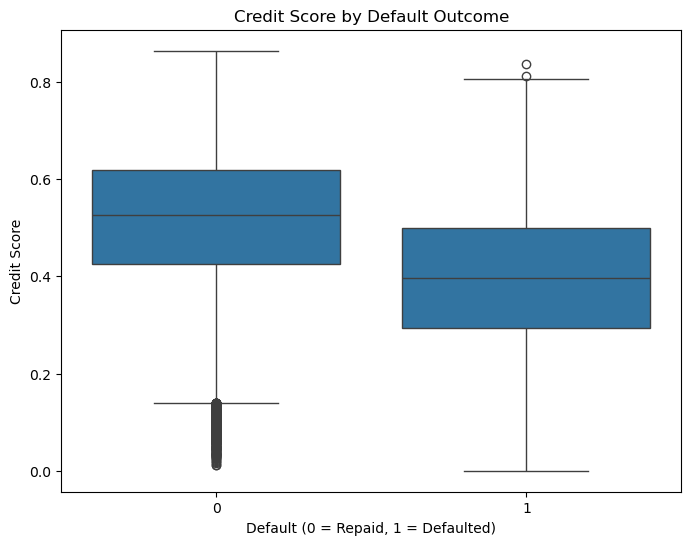

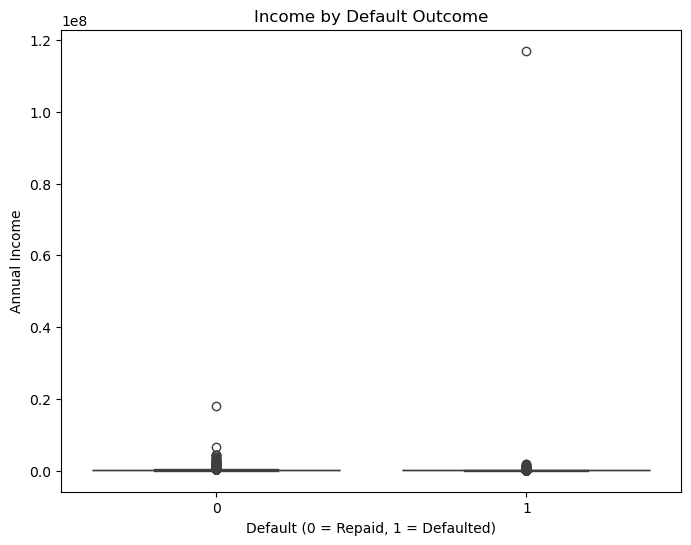

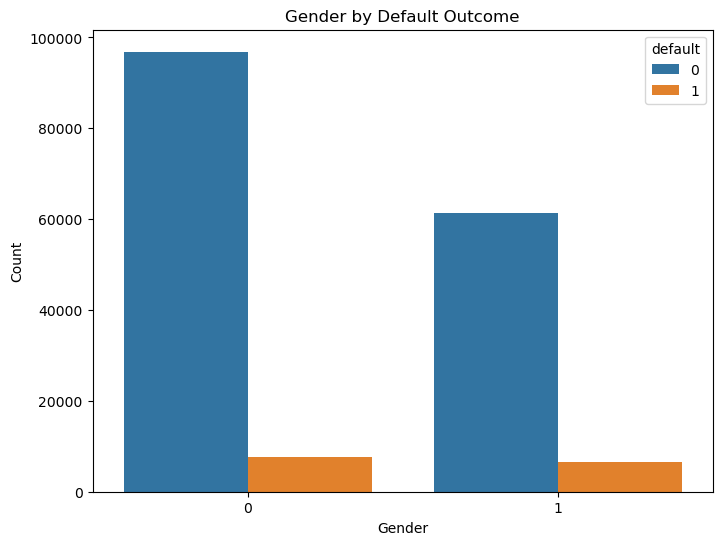

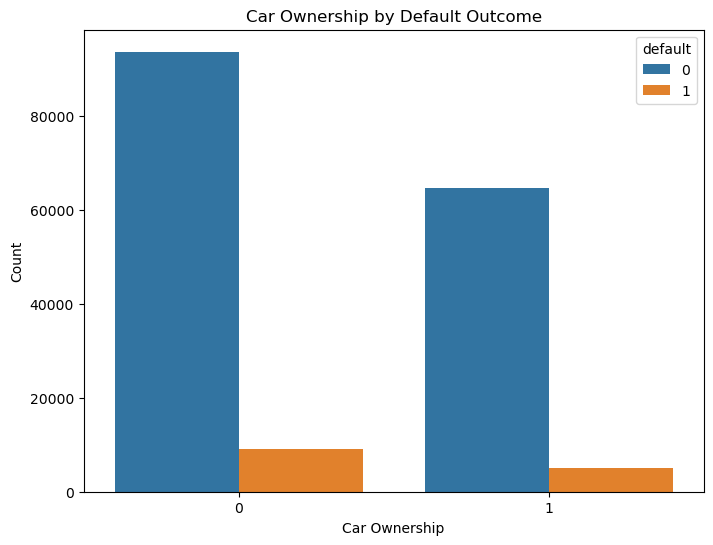

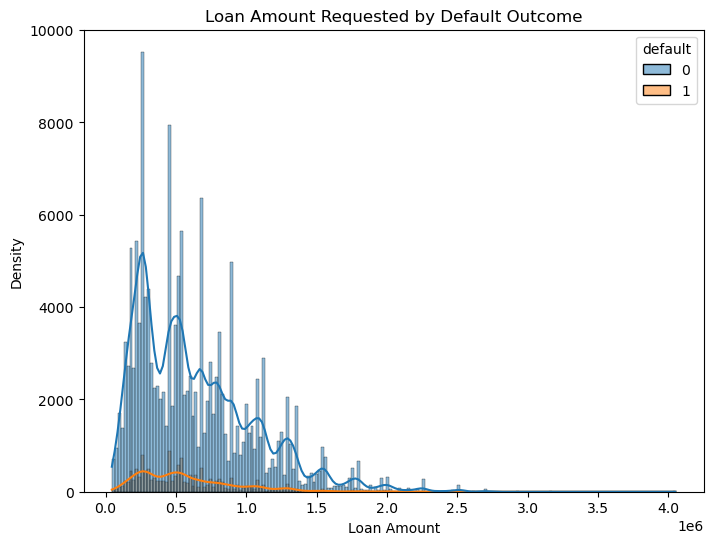

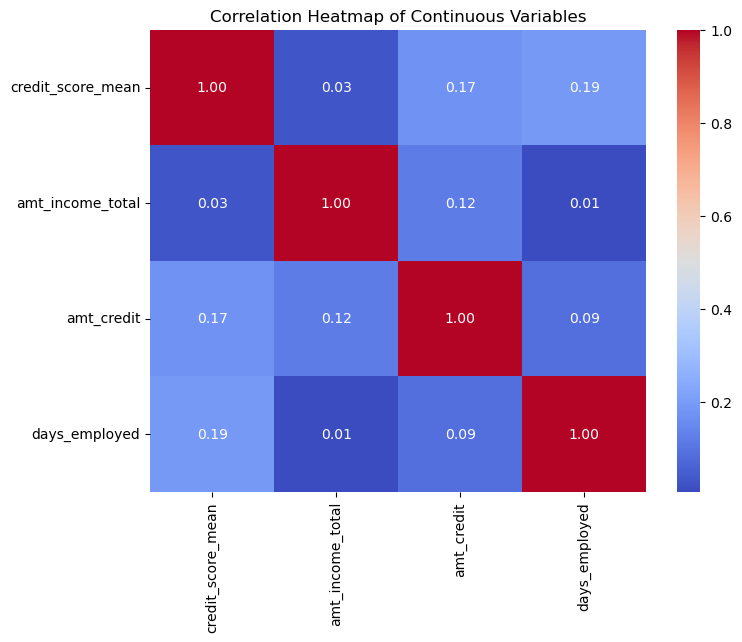

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Box Plot: credit_score_mean by default outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='credit_score_mean', data=df)
plt.title('Credit Score by Default Outcome')
plt.xlabel('Default (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Credit Score')
plt.show()

# 2. Box Plot: amt_income_total by default outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='amt_income_total', data=df)
plt.title('Income by Default Outcome')
plt.xlabel('Default (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Annual Income')
plt.show()

# 3. Bar Plot: code_gender by default outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='code_gender', hue='default', data=df)
plt.title('Gender by Default Outcome')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Bar Plot: flag_own_car by default outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='flag_own_car', hue='default', data=df)
plt.title('Car Ownership by Default Outcome')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.show()

# 5. Histogram: amt_credit by default outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='amt_credit', hue='default', kde=True)
plt.title('Loan Amount Requested by Default Outcome')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

# 6. Correlation Heatmap of continuous variables
corr = df[['credit_score_mean', 'amt_income_total', 'amt_credit', 'days_employed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()